In [ ]:
#stocks predictions (LSTM) using past 60 day stocks price

In [2]:
#Import the libraries
import math
import fix_yahoo_finance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the stock quote

data = yf.download('BP', start = '2015-01-01', end='2020-06-17')
data


[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,38.209999,38.369999,37.730000,38.119999,26.496552,6290100
2015-01-05,36.590000,36.660000,35.630001,36.099998,25.092482,16126000
2015-01-06,36.009998,36.500000,35.660000,35.830002,24.904816,11575800
2015-01-07,36.000000,36.349998,35.660000,35.919998,24.967367,9192400
2015-01-08,36.430000,36.919998,36.250000,36.730000,25.530388,10789700
...,...,...,...,...,...,...
2020-06-10,26.889999,26.990000,26.280001,26.379999,26.379999,9728700
2020-06-11,25.080000,25.389999,24.030001,24.070000,24.070000,14777900
2020-06-12,25.000000,25.250000,24.209999,24.750000,24.750000,11712300


In [4]:
#Get the number of rows and columns in the data set
data.shape

(1373, 6)

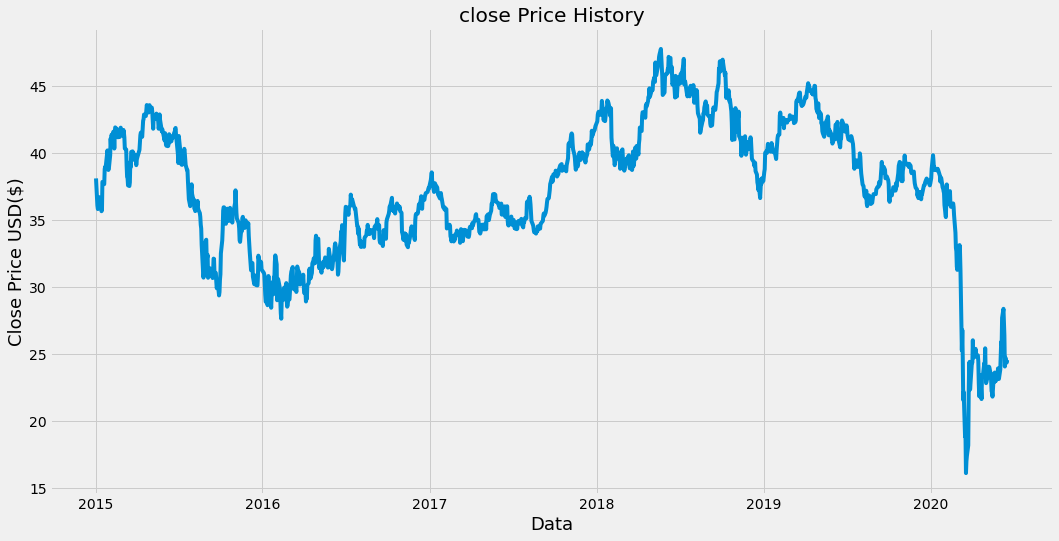

In [5]:
#Visualize the close price
plt.figure(figsize=(16,8))
plt.title('close Price History')
plt.plot(data['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()


In [6]:
#Create a new dataframe with only the close colum
data1= data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data1.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1099

In [7]:
#Scale the data(min,max value of the data between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(dataset)
scaledData


array([[0.69476004],
       [0.63099738],
       [0.62247478],
       ...,
       [0.27272724],
       [0.26041667],
       [0.26641408]])

In [9]:
#create the training data set
#creat the scaled training data set
train_data= scaledData[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.69476004, 0.63099738, 0.62247478, 0.62531556, 0.65088381,
       0.64614902, 0.62941913, 0.62657822, 0.61742415, 0.61931815,
       0.68655303, 0.68118681, 0.71685603, 0.72190653, 0.71938134,
       0.75157819, 0.76073226, 0.71875   , 0.71464643, 0.71717175,
       0.74968434, 0.78882566, 0.76830808, 0.79766414, 0.79103526,
       0.80492424, 0.79356057, 0.76515142, 0.79640148, 0.81502522,
       0.81029034, 0.8093434 , 0.7916666 , 0.79450751, 0.79261364,
       0.8042929 , 0.81439391, 0.79703283, 0.79955802, 0.79513883,
       0.80902781, 0.80239893, 0.79135098, 0.76515142, 0.76294186,
       0.72380051, 0.69823229, 0.6960227 , 0.67834586, 0.67676761,
       0.68529037, 0.73358576, 0.72159091, 0.75726001, 0.75852266,
       0.73863627, 0.7544191 , 0.74810606, 0.74179293, 0.749053  ])]
[0.726010101010101]

[array([0.69476004, 0.63099738, 0.62247478, 0.62531556, 0.65088381,
       0.64614902, 0.62941913, 0.62657822, 0.61742415, 0.61931815,
       0.68655303, 0.68118681, 0.7168

In [10]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
#Reshape the data for three  dimensional array
x_train= np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1039, 60, 1)

In [12]:
#Build the LSTM model
model= Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
#Train the model or (fit the model)
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
1039/1039 [==============================] - 42s 40ms/step - loss: 0.0041


In [15]:
#Create the testing data set
#Create a new array containing scaled values from index 
test_data = scaledData[training_data_len-60: , : ]
#Create the data  stes x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [16]:
#Covert the data  to a numpy arry
x_test= np.array(x_test)

In [17]:
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
#Get the models predicted price values
predictions= model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse= np.sqrt(np.mean(predictions- y_test)**2)
rmse

1.171632902813765

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


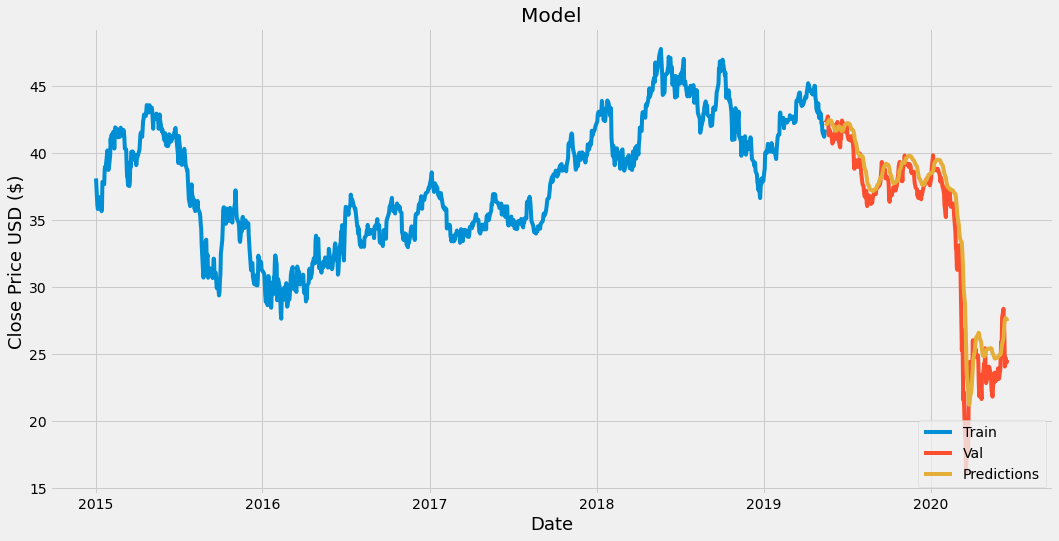

In [20]:
#Plot the data
train= data[:training_data_len]
valid= data[training_data_len:]
valid['Prediction']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train', 'Val', 'Predictions'],loc='lower right')
plt.show()

In [21]:
#show the valid and predicted prices
valid

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2019-05-16,41.939999,42.389999,41.930000,42.279999,39.190727,5039700,42.242897
2019-05-17,42.470001,42.610001,42.270000,42.340000,39.246346,4132700,42.191833
2019-05-20,42.580002,42.730000,42.340000,42.580002,39.468811,3859600,42.202290
2019-05-21,42.860001,43.000000,42.750000,42.750000,39.626389,3397200,42.269672
2019-05-22,42.779999,42.799999,42.290001,42.340000,39.246346,4134300,42.379753
...,...,...,...,...,...,...,...
2020-06-10,26.889999,26.990000,26.280001,26.379999,26.379999,9728700,27.246630
2020-06-11,25.080000,25.389999,24.030001,24.070000,24.070000,14777900,27.607740
2020-06-12,25.000000,25.250000,24.209999,24.750000,24.750000,11712300,27.685799


In [22]:
#Get the quote
Stocks_quote= web.DataReader('BP',data_source='yahoo',start='2015-01-01',end='2020-12-17')
#Create a new dataframe
new_df = Stocks_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
#Append teh past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test=np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price= model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[26.392454]]
